# Visulaization of College Graduates Employment 

Goal: The project aims to clean, analyze and visualize the employment data of College Graduates 2010-2012.

Method: The main analysis is data visualization using pyplot and matplotlib libraries.

Data set: 173 data entries from *American Community Survey 2010-2012 Public Use Microdata Series* are avaliable [here](http://www.census.gov/programs-surveys/acs/data/pums.html).

Key parameter: Median earnings as a function of college major and gender.

### <a id = 0> Table of contents:</a>

---

1. [Open the data](#1)
2. [Scatter plots](#2)
3. [Histogram plots](#3)
4. [Scatter-matrix](#4)
5. [Bar plots](#5)
6. [Grouped bar plots](#6)
7. [Box with whiskers plot](#7)
8. [Hexagonal bin plots](#8)

<a id = 1> Open the data: </a> - [Top](#0)

In [1]:
#import libratries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#display plots inline
%matplotlib inline

#open file
recent_grads = pd.read_csv("recent-grads.csv") #encoding = "Latin-1" or "Windows-1252"

Inside of the data set:

In [2]:
#get info about data set
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [3]:
#top data entries
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
#bottom data enteries
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
#numeric data stats
recent_grads.describe() 

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


### About data 

|Variable|Description|
|-----------|-----------|
|Rank|Rank by median earnings (the dataset is ordered by this column)|
|Major_code|Major code|
|Major|Major description|
|Major_category|Category of major|
|Total|Total number of people with major|
|Sample_size|Sample size (unweighted) of full-time|
|Men|Male graduates|
|Women|Female graduates|
|ShareWomen|Women as share of total|
|Employed|Number employed|
|Median|Median salary of full-time, year-round workers|
|Low_wage_jobs|Number in low-wage service jobs|
|Full_time|Number employed 35 hours or more|
|Part_time|Number employed less than 35 hours|

### Primary observations about data cleaning

The colums with NaN entries:

- 3   `Total`
- 4   `Men`
- 5   `Women`
- 7   `ShareWomen`

Probably there is one missing/NaN value.

The columns do not require a data type conversion, integer and float data types are in order.

The column name `ShareWomen` requires renaming to the common style with "_" word separation.

- **Detect and delete missing values**

In [6]:
#number of rows
raw_data_count = len(recent_grads)
print("Number of raw rows: ",raw_data_count)

Number of raw rows:  173


In [7]:
#drop rows with missing data
recent_grads = recent_grads.dropna()

#clean data number of rows
cleaned_data_count = len(recent_grads)
print("Number of cleaned rows: ",cleaned_data_count)

Number of cleaned rows:  172


Indeed, there is one row with missing values that has been deleted.

- **Columns rename**

In [8]:
recent_grads.rename({"ShareWomen":"Share_women"}, axis=1,inplace = True)
recent_grads.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'Share_women', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

### Plots

The following part of analysis is dedicated to the data visualization, exploring their relations.

<a id = 2> Scatter plots: </a> - [Top](#0)

<AxesSubplot:title={'center':'Median of income vs. Woman'}, xlabel='Women', ylabel='Median'>

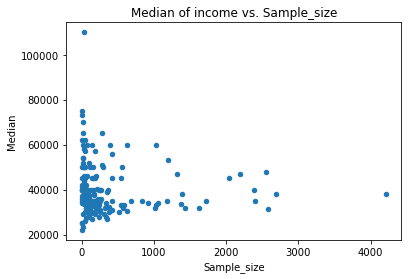

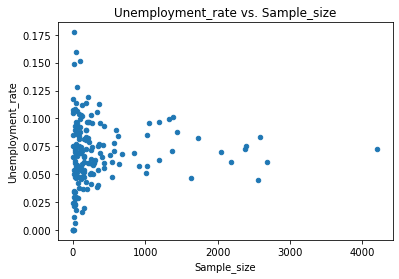

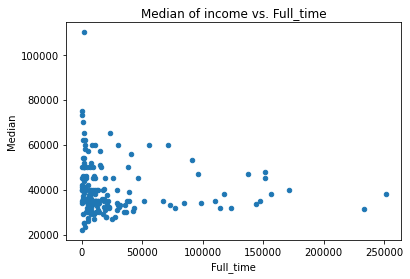

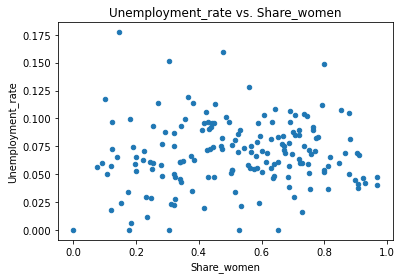

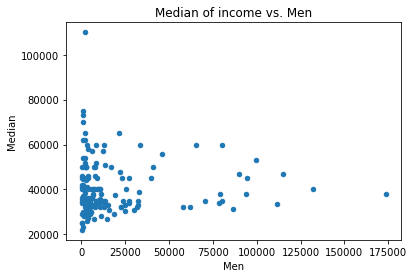

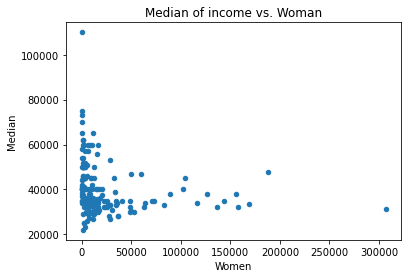

In [9]:
recent_grads.plot(x="Sample_size" ,
                  y="Median" ,
                  kind='scatter' ,
                  title="Median of income vs. Sample_size"
                 )

recent_grads.plot(x="Sample_size" ,
                  y="Unemployment_rate" ,
                  kind='scatter' ,
                  title="Unemployment_rate vs. Sample_size"
                 )

recent_grads.plot(x="Full_time" ,
                  y="Median" ,
                  kind='scatter' ,
                  title="Median of income vs. Full_time"
                 )

recent_grads.plot(x="Share_women" ,
                  y="Unemployment_rate" ,
                  kind='scatter' ,
                  title="Unemployment_rate vs. Share_women"
                 )

recent_grads.plot(x="Men" ,
                  y="Median" ,
                  kind='scatter' ,
                  title="Median of income vs. Men"
                 )

recent_grads.plot(x="Women" ,
                  y="Median" ,
                  kind='scatter' ,
                  title="Median of income vs. Woman"
                 )

<AxesSubplot:title={'center':'Median of income vs. Share_man'}, xlabel='Share_men', ylabel='Median'>

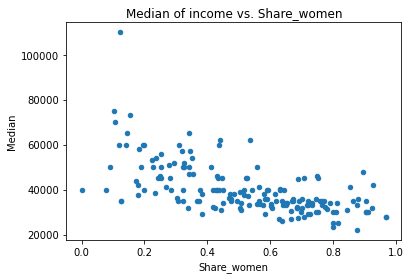

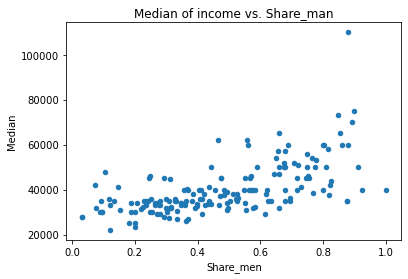

In [10]:
recent_grads.plot(x="Share_women" ,
                  y="Median" ,
                  kind='scatter' ,
                  title="Median of income vs. Share_women"
                 )

#find Men as share of total
share_man = 1 - recent_grads["Share_women"]
recent_grads["Share_men"] = share_man 

recent_grads.plot(x="Share_men" ,
                  y="Median" ,
                  kind='scatter' ,
                  title="Median of income vs. Share_man"
                 )

**Conclusions based on scatter plots**

- Do students in more popular majors make more money?

The most popular majors do not guarantee higher income accroding to the Median vs. Sample_size plot. For the majority of smaple sizes being smaller than 500, the median income is varying from ~20k to ~60k with the most common being ~30k.

The unemployment rate is varing from less then 1% up to 17% for the less popular majors, whereas for the more popular once it is ~8%.

- Do students that majored in subjects that were majority female make more money?

To answer this question it is more useful to plot Median of income as a function of the Women and Man as share of total.
For majors where the share of women is increases from half till totally female, the median income decreases from 40k to 20k; whereas for majors where the share of men is increases from half till totally male, the median income increases from 40k to 80k.

The data clearly point to pay inequality and bias against female employees.

- Is there any link between the number of full-time employees and median salary?

As the number of full time employees increases from less than 50.000 employees up to 250.000, the wage range narrows from being ~20k-80k to ~40k.

<a id = 3> Histogram plots: </a> - [Top](#0)

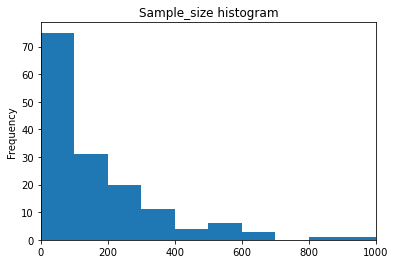

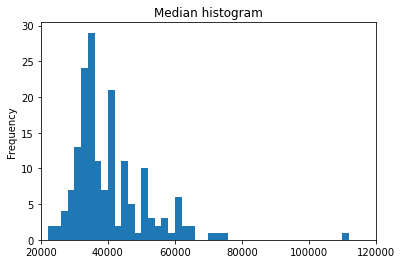

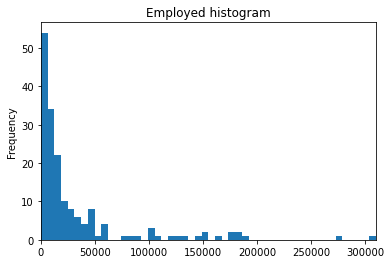

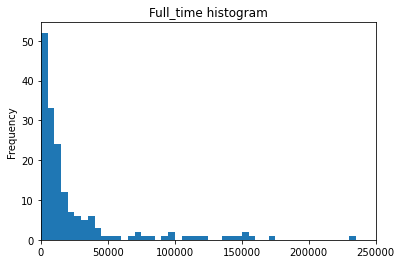

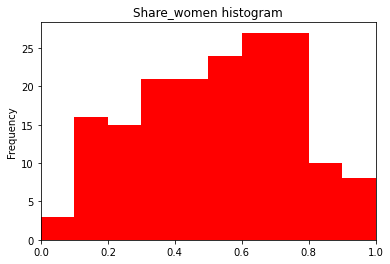

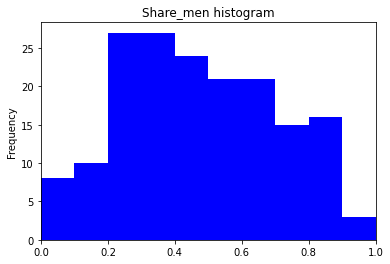

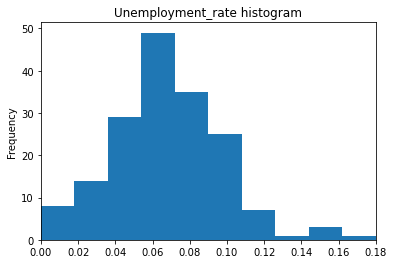

In [11]:
recent_grads['Sample_size'].plot(bins=50,
                                      kind='hist',
                                      range=(0,5000)
                                )
plt.title("Sample_size histogram")
plt.xlim(0,1000)
plt.show()

recent_grads['Median'].plot(bins=50,
                                 kind='hist',
                                 range=(20000,120000)
                            )
plt.title("Median histogram")
plt.xlim(20000,120000)
plt.show()

recent_grads['Employed'].plot(bins=50,
                                    kind='hist',
                                    range=(0,310000)
                                )
plt.title("Employed histogram")
plt.xlim(0,310000)
plt.show()

recent_grads['Full_time'].plot(bins=50,
                                    kind='hist',
                                    range=(0,250000)
                                )
plt.title("Full_time histogram")
plt.xlim(0,250000)
plt.show()

recent_grads['Share_women'].plot(bins=10,
                                      kind='hist',
                                      range=(0,1),
                                      color ='red'
                                    )
plt.title("Share_women histogram")
plt.xlim(0,1)
plt.show()

recent_grads['Share_men'].plot(bins=10,
                                      kind='hist',
                                      range=(0,1),
                                      color ='blue'
                                    )
plt.title("Share_men histogram")
plt.xlim(0,1)
plt.show()

recent_grads['Unemployment_rate'].plot(bins=10,
                                            kind='hist',
                                            range=(0,0.18)
                                        )
plt.title("Unemployment_rate histogram")
plt.xlim(0,0.18)
plt.show()


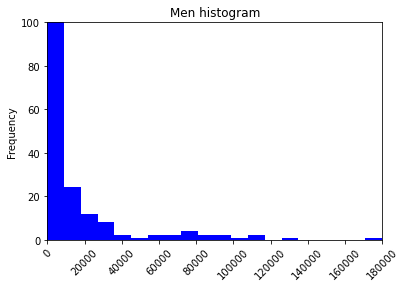

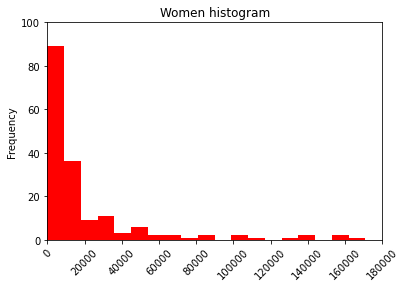

In [12]:
recent_grads['Men'].plot(bins=20,
                              kind='hist',
                              range=(0,180000),
                              rot = 45,
                              color ='blue'
                        )
plt.title("Men histogram")
plt.xlim(0,180000)
plt.ylim(0,100)
plt.show()

recent_grads['Women'].plot(bins=20,
                                kind='hist',
                                range=(0,180000),
                                rot = 45,
                                color ='red'
                            )
plt.title("Women histogram")
plt.xlim(0,180000)
plt.ylim(0,100)
plt.show()

**Conclusions based on histogram plots**

- The median of income historgam shows that majority of wage for graduate students is between 20k and 40 k. 
- The two historgams - the number of employees and the number of employees 35 hours or more graduates - are highly resembing each other as it was expected.
- The men and women as share of total show that most common distribution of women to men across all graduates is 70 to 30.
- The most common unemployment rate is ~6 per cent, whereas ~18 percent the highest one.
- The most common number of male and female graduates is less than 20000 across all majores.

<a id = 4> Scatter-matrix: </a> - [Top](#0)

In [13]:
from pandas.plotting import scatter_matrix 

The first scatter-matrix plot to explore is with the Sample_size and Median columns.

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>]], dtype=object)

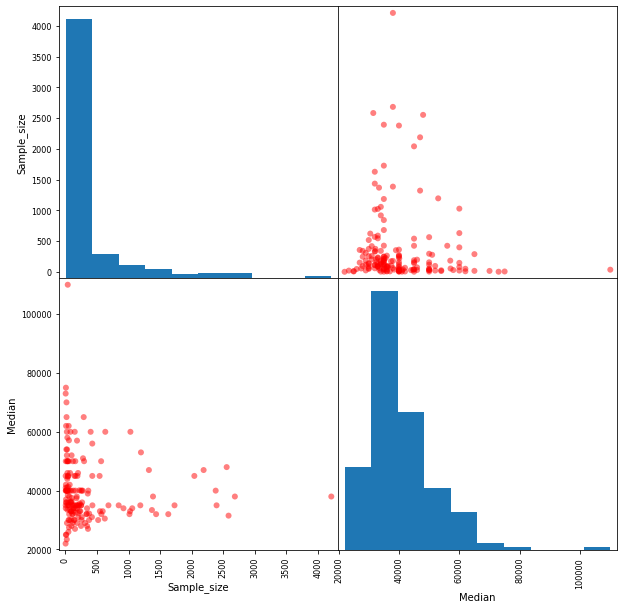

In [14]:
scatter_matrix(recent_grads[["Sample_size","Median"]],
               figsize=(10,10),
                marker='o',
               color='red'
              )

The first scatter-matrix plot to explore is with the Sample_size, Median, and Unemployment_rate columns.

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Median'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Unemployment_rate'>]],
      dtype=object)

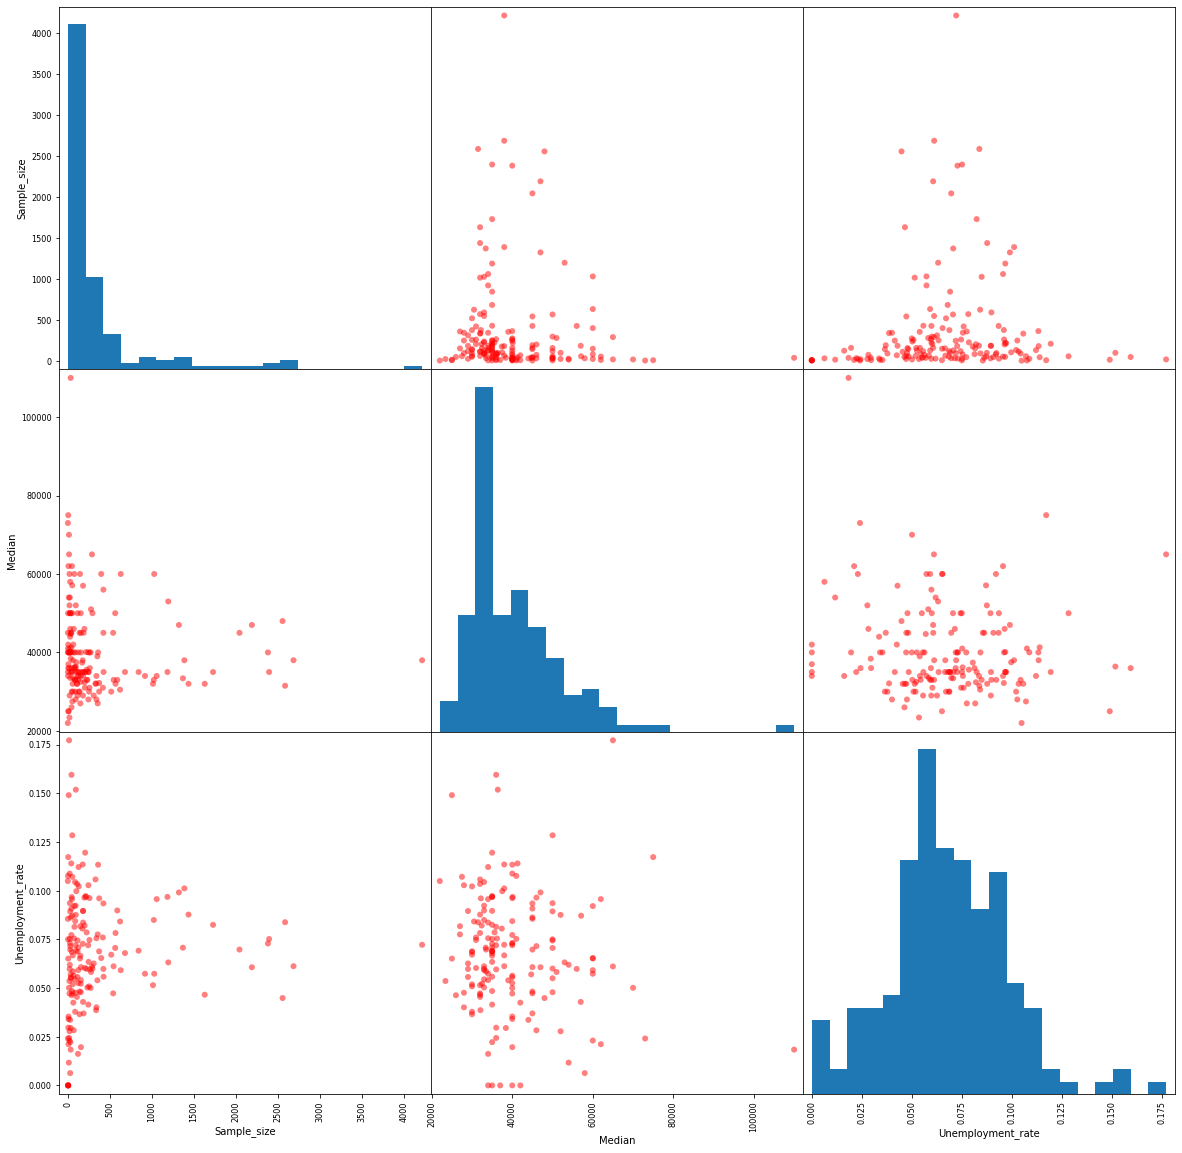

In [15]:
scatter_matrix(recent_grads[["Sample_size","Median","Unemployment_rate"]],
               figsize=(20,20),
              hist_kwds={'bins':20},
               marker='o',
               color='red'
              )

array([[<AxesSubplot:xlabel='Share_women', ylabel='Share_women'>,
        <AxesSubplot:xlabel='Share_men', ylabel='Share_women'>,
        <AxesSubplot:xlabel='Median', ylabel='Share_women'>],
       [<AxesSubplot:xlabel='Share_women', ylabel='Share_men'>,
        <AxesSubplot:xlabel='Share_men', ylabel='Share_men'>,
        <AxesSubplot:xlabel='Median', ylabel='Share_men'>],
       [<AxesSubplot:xlabel='Share_women', ylabel='Median'>,
        <AxesSubplot:xlabel='Share_men', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>]], dtype=object)

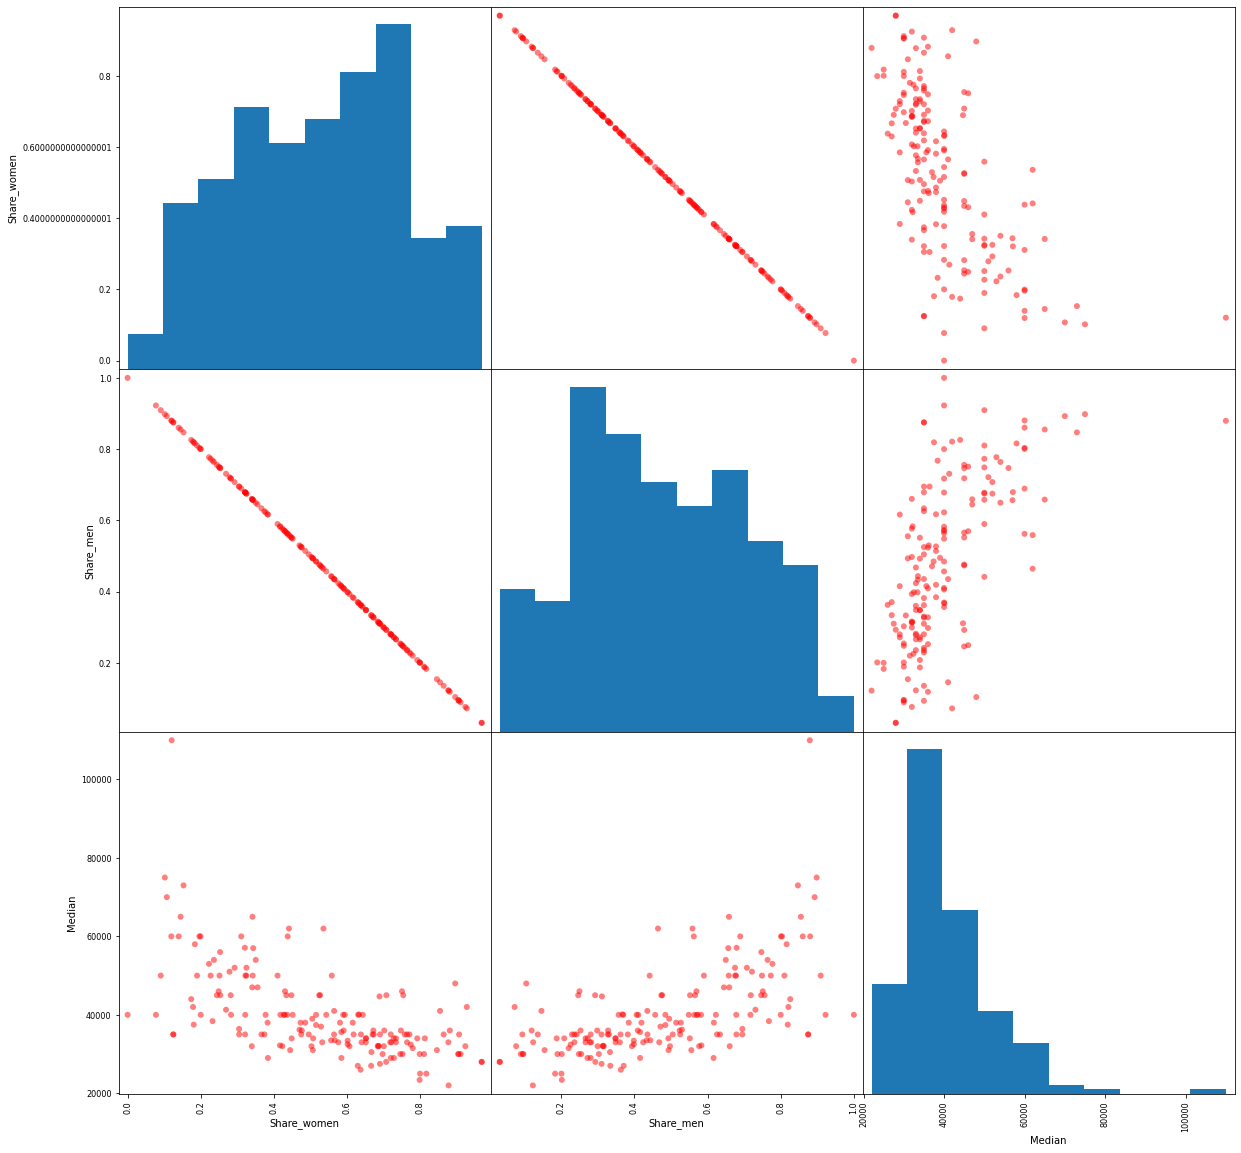

In [16]:
scatter_matrix(recent_grads[["Share_women","Share_men","Median"]],
               figsize=(20,20),
              hist_kwds={'bins':10},
               marker='o',
               color='red'
              )

**Conclusions based on scatter-matrix plots**

- From the plot of women and men share as total it is clear, that median of income is decreasing as number of women in major is increasing, and vice versa for men preferred majors.

- From the plot of sample size versus median of income, we could conclude that graduates of less popular but more common majors with ~500 students or less might have wide range of income; whereas the most crowded majors would result in rather average income.

<a id = 5> Bar plots: </a> - [Top](#0)

<AxesSubplot:title={'center':'Unemployment rate for the last 10 records'}, ylabel='Major'>

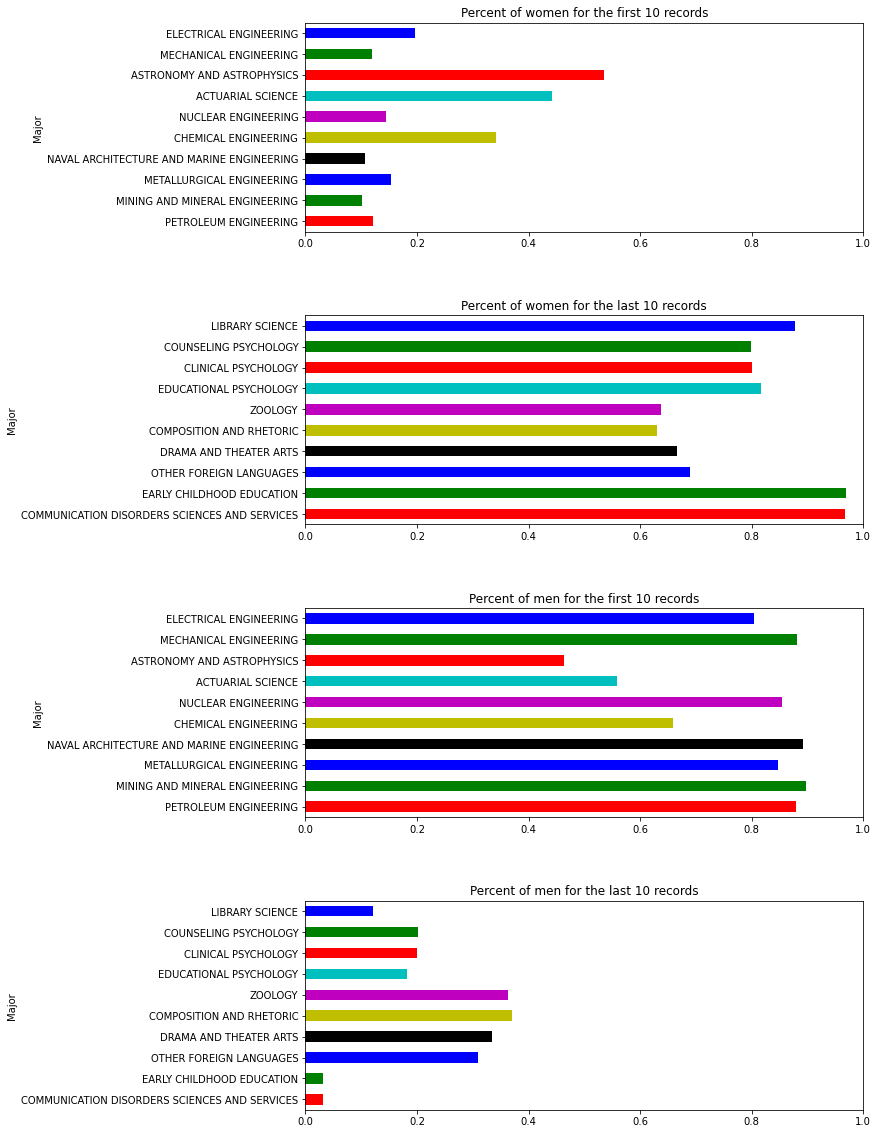

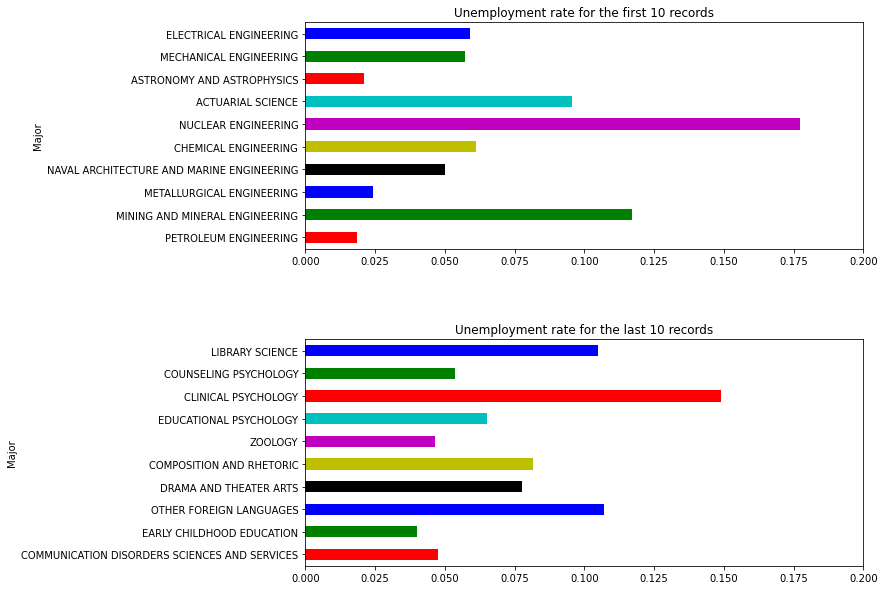

In [17]:
fig, [(ax1),(ax2),(ax3),(ax4)] = plt.subplots(nrows=4,
                                             ncols=1,
                                             figsize=(10,20)
                                             )
plt.subplots_adjust(hspace=.4) #space between plots

my_colors = list('rgbkymc')

recent_grads.head(10).plot(ax=ax1,
                          x="Major",
                          y="Share_women",
                          kind='barh',
                          legend=False,
                          title='Percent of women for the first 10 records',
                          color=my_colors,
                          xlim=(0,1)
                          )

recent_grads.tail(10).plot(ax=ax2,
                          x="Major",
                          y="Share_women",
                          kind='barh',
                          legend=False,
                          title='Percent of women for the last 10 records',
                          color=my_colors,
                          xlim=(0,1)
                          )

recent_grads.head(10).plot(ax=ax3,
                          x="Major",
                          y="Share_men",
                          kind='barh',
                          legend=False,
                          title='Percent of men for the first 10 records',
                          color=my_colors,
                          xlim=(0,1)
                          )

recent_grads.tail(10).plot(ax=ax4,
                          x="Major",
                          y="Share_men",
                          kind='barh',
                          legend=False,
                          title='Percent of men for the last 10 records',
                          color=my_colors,
                          xlim=(0,1)
                          )

fig, [(ax5),(ax6)] = plt.subplots(nrows=2,
                                  ncols=1,
                                  figsize=(10,10)
                                  )
plt.subplots_adjust(hspace=.4) #space between plots

recent_grads.head(10).plot(ax=ax5,
                          x="Major",
                          y="Unemployment_rate",
                          kind='barh',
                          legend=False,
                          title='Unemployment rate for the first 10 records',
                          color=my_colors,
                          xlim=(0,.2)
                          )

recent_grads.tail(10).plot(ax=ax6,
                          x="Major",
                          y="Unemployment_rate",
                          kind='barh',
                          legend=False,
                          title='Unemployment rate for the last 10 records',
                          color=my_colors,
                          xlim=(0,.2)
                          )


**Conclusions based on bar plots**

- As the data is ranked by median income in decreasing order, the percent of female graduates with the highly payed majors as engineering and science is significantly lower compare to male graduates. On the contrary, the lowest income majors as phylology and humanity studies are mainly occupied by female graduates.

- The unemployment rate seems to be rather independent for the top and bottom paid majors.

<a id = 6> Grouped bar plots: </a> - [Top](#0)

Use a grouped bar plot to compare the number of men with the number of women in each category of majors.

Text(0.5, 0, 'Number of graduates')

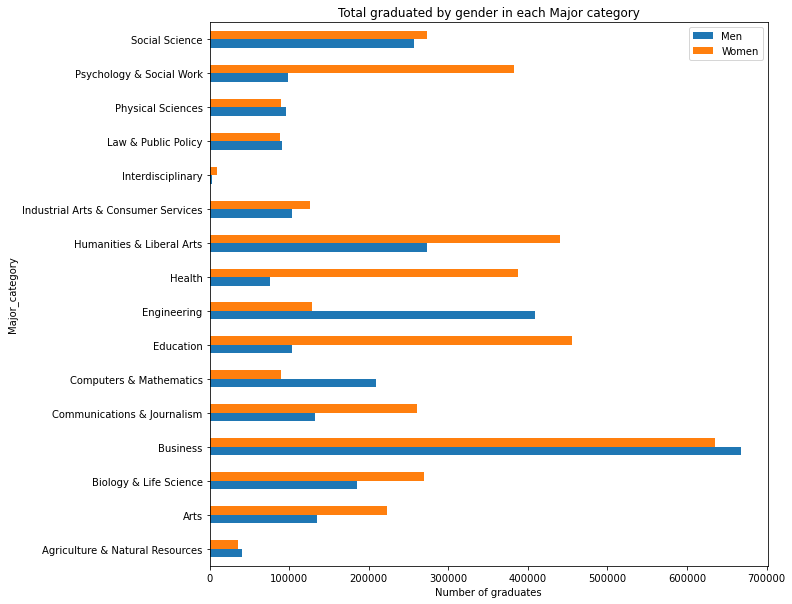

In [18]:
ax = (recent_grads[["Major_category","Men","Women"]].
     groupby("Major_category").
     sum().
     plot.barh(figsize=(10,10))
     )
ax.set_title('Total graduated by gender in each Major category')
ax.set_xlabel('Number of graduates')

<a id = 7> Box with whiskers plot: </a> - [Top](#0)

Text(0.5, 1.0, 'Unemployment_rate boxplot')

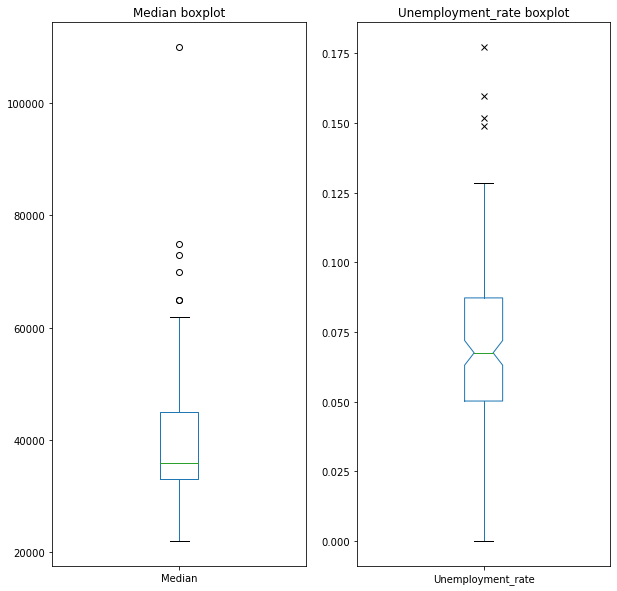

In [19]:
fig, [ax1,ax2] = plt.subplots(nrows=1,
                             ncols=2,
                             figsize=(10,10))

recent_grads["Median"].plot.box(ax=ax1)
ax1.set_title('Median boxplot')


recent_grads["Unemployment_rate"].plot.box(ax=ax2,
                                          notch=True,
                                          flierprops=dict(marker='x'))
ax2.set_title('Unemployment_rate boxplot')


<a id = 8> Hexagonal bin plots: </a> - [Top](#0)

<AxesSubplot:xlabel='Share_men', ylabel='Median'>

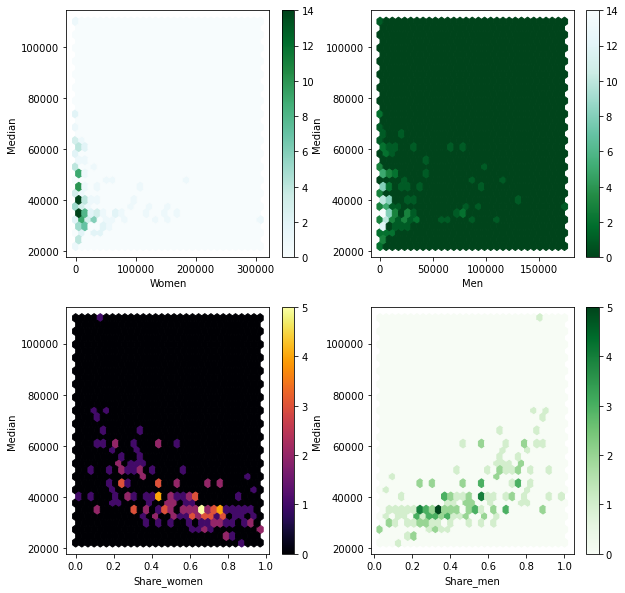

In [20]:
fig, axs = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10,10))

recent_grads.plot.hexbin(x="Women",
                        y="Median",
                        gridsize=30,
                        ax=axs[0,0])

recent_grads.plot.hexbin(x="Men",
                        y="Median",
                        gridsize=30,
                        ax=axs[0,1],
                        cmap=plt.cm.BuGn_r)


recent_grads.plot.hexbin(x="Share_women",
                        y="Median",
                        gridsize=30,
                        ax=axs[1,0],
                        cmap='inferno') #color

recent_grads.plot.hexbin(x="Share_men",
                        y="Median",
                        gridsize=30,
                        ax=axs[1,1],
                        cmap=plt.cm.Greens) #color

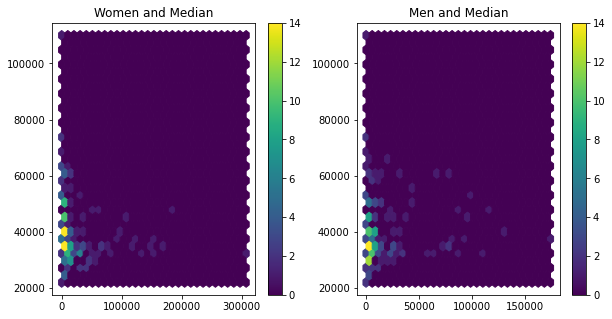

In [21]:
fig, axs = plt.subplots(ncols=2,
                       figsize=(10,5))

ax = axs[0]
hb=ax.hexbin(x=recent_grads["Women"],
            y=recent_grads["Median"],
            gridsize=30)
ax.set_title("Women and Median")
cb = fig.colorbar(hb, ax=ax)

ax = axs[1]
hb=ax.hexbin(x=recent_grads["Men"],
            y=recent_grads["Median"],
            gridsize=30)
ax.set_title("Men and Median")
cb = fig.colorbar(hb, ax=ax)